(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Clustering food recipes from around the world

In this assignment, you are expected to hierarchically cluster food recipes. We will be using YY Ahn's dataset "[Recipe datasets with cuisines](http://yongyeol.com/data/scirep-cuisines-detail.zip)", which for each recipe provides a list of ingredients and the country of origin, scraped from popular recipe websites. He also provides an [ingredient and compounds dataset](http://yongyeol.com/data/ingr_comp.zip), which you could potentially also make use of, if you find it interesting.

You will be graded as follow:
* Data parsing and representation **(20 pts)**
* Clustering **(30 pts)**
* Visualization **(30 pts)**
* Short (datailed) analysis of specific cluster **(20 pts)**

---------------------------

In [2]:
# Web scraping
#     1. Retrieve webpages:
#         . wget, curl: command line tool for transferring
#             data with URL syntax
#         . Fully-fledged web browsers
#             Selenium (web browser automation)
#     2. Parse and extract information form the html
#         . html/json parsers

# For retrieve Webpages:
#     Either 1. Embed command line tools (wget or curl) in python code:
            # out_file = 'test.html'
            # url = 'www.xxx.com'
            # cmd = 'curl -L -m 2 "' + url + '" >'  + ofile
            # os.system(cmd)

#     or    2. Use a python network-access libraries
#         . Urllib, Request, pycurl,etc.
#             import urllib2
#             response = urllib2.urlopen('http://www.tripadvisor.com/Hotels-g60745-Boston_Massachusetts-Hotels.html')
#             html = response.read()

import numpy as np
import scipy.cluster.hierarchy as hr
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

#Parse data to create a dictionary of dictionaries where the key to the big dictionary is a 
# country of the world, the value is another dictionary. The key to the inner dictinoary is an 
# ingredient and its value is how many recipes in that particular country use that ingredient. 

countries = {}
ingredients = []

# print countries.keys()
with open('allr_recipes.txt') as f:
    for line in f:
        row = line.split('\t')
        row[len(row) - 1] = row[len(row) - 1][:-1]
        ckey = row[0]
        row.remove(ckey)
        if ckey in countries.keys():
            for i in range(0, len(row)):
                dkey = row[i]
                if dkey in diction.keys():
                    diction[dkey] += 1
                else:
                    if dkey not in ingredients:
                        ingredients.append(dkey)
                    diction[dkey] = 1
        else:
            diction = {}
            countries[ckey] = {}
            for i in range(0, len(row)):
                dkey = row[i]
                if dkey not in ingredients:
                    ingredients.append(dkey)
                diction[dkey] = 1
        countries[ckey] = diction
f.close()

# print countries
# print ingredients

#Parse data to create a dictionary of dictionaries where the key to the big dictionary is a 
# region of the world, the value is another dictionary. The key to the inner dictinoary is an 
# ingredient and its value is how many recipes in that particular region use that ingredient. 

regions = {}
maps = {}
with open('map.txt') as f:
    for line in f:
        row = line.split('\t')
        row[len(row) - 1] = row[len(row) - 1][:-1]
        maps[row[0]] = row[1]
f.close()

for country in countries.keys():
    region = maps[country]
    if region not in regions.keys():
        regions[region] = {}
    diction = countries[country]
    for k in diction.keys():
        if k not in regions[region].keys():
            regions[region][k] = diction[k]
        else:
            regions[region][k] += diction[k]
# print regions
# print maps


In [4]:
#Finds the most popular ingredient in both North American recipes and American recipes and the 
# number of recipes that use that ingredient

most_NorthAmerican = ''
most_EastAsian = ''
most_American = ''
most_China = ''

max_val = 0
NA = regions['NorthAmerican']
EA = regions['EastAsian']
C = countries['China']
US = countries['American']

for key in NA.keys():
    if NA[key] > max_val:
        most_NorthAmerican = key
        max_val = NA[key]
        
max_val = 0

for key in EA.keys():
    if EA[key] > max_val:
        most_EastAsian = key
        max_val = EA[key]

max_val = 0

for key in US.keys():
    if US[key] > max_val:
        most_American = key
        max_val = US[key]
        
max_val = 0

for key in C.keys():
    if C[key] > max_val:
        most_China = key
        max_val = C[key]


        
print 'North American uses ' + most_NorthAmerican + " most and with "
print  NA['egg']
print 'And still uses soy_sauce with: ' 
print NA['soy_sauce']
print 
print 'East Asia use ' + most_EastAsian +" most with"
print EA['soy_sauce']
print 'And still uses egg with: ' 
print EA['egg']
print
print 'American use ' + most_American +" most with"
print US['egg']
print 'And still uses soy_sauce with: ' 
print US['soy_sauce']
print
print 'China use ' + most_China +" most with"
print C['soy_sauce']
print 'And still uses egg with: ' 
print C['egg']


North American uses egg most and with 
14802
And still uses soy_sauce with: 
1498

East Asia use soy_sauce most with
164
And still uses egg with: 
84

American use egg most with
14528
And still uses soy_sauce with: 
1441

China use soy_sauce most with
92
And still uses egg with: 
51


In [5]:
# sort the dataframe by alphabetical order

sorted_regions = sorted(regions)
sorted_countries = sorted(countries)
sorted_ingredients = sorted(ingredients)

# print sorted_regions
# print sorted_countries
# print sorted_ingredients


['EastAsian', 'NorthAmerican']
[164, 1498]


<Container object of 2 artists>

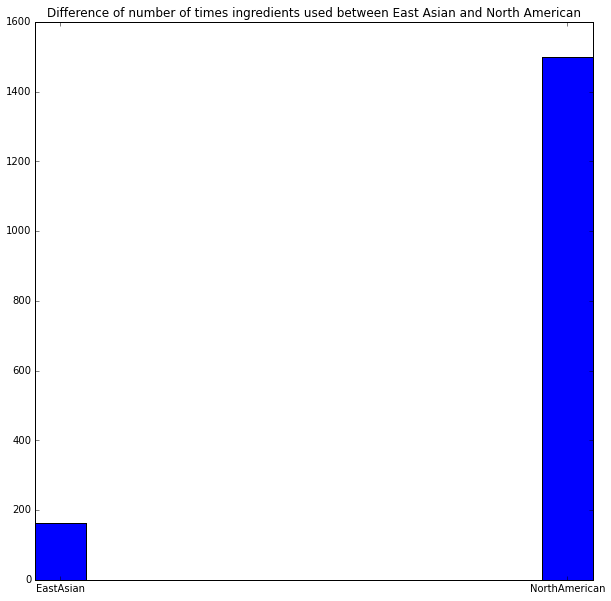

In [6]:
soysause_region = []
second_max_rval = 0
second_max_region = ''
for r in sorted_regions:
    if 'soy_sauce' in regions[r].keys():
        val = regions[r]['soy_sauce']
        soysause_region.append(val)
        if r != 'EastAsian':
            if val > second_max_rval:
                second_max_rval = val
                second_max_region = r
    else:
        soysause_region.append(0)

# print second_max_region
# print second_max_rval
EA_NA = [sorted_regions[1]]
EA_NA.append(sorted_regions[5])
print EA_NA

SS_RE = [soysause_region[1],soysause_region[5]]
print SS_RE

fig, ax = plt.subplots(figsize = (10,10))
count = 1
x_coord = np.arange(len(EA_NA))
width = 0.1
ax.set_xticks(x_coord+width/2)
ax.set_xticklabels(EA_NA)
plt.title('Difference of number of times ingredients used between East Asian and North American')
plt.bar(x_coord, SS_RE, color = 'b', width = width)

['American', 'China']
[1441, 92]


<Container object of 2 artists>

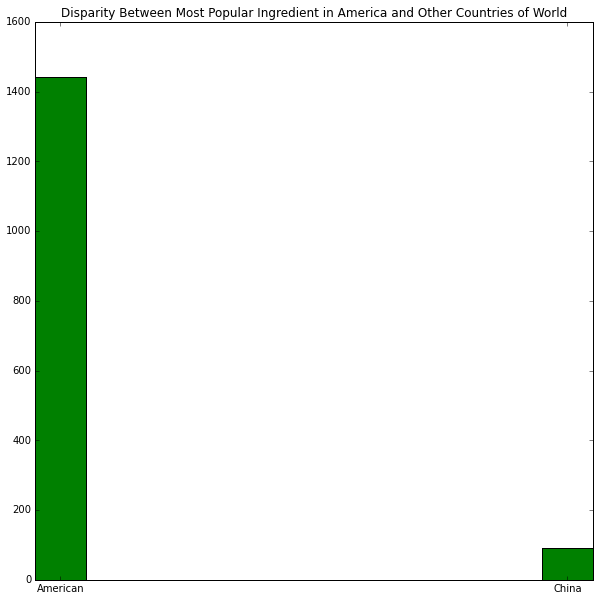

In [7]:
#Plots a bar graph for all the countries and how many of their recipes use eggs. 

soysause_countries = []
second_max_cval = 0
second_max_country = ''
for c in sorted_countries:
    if 'soy_sauce' in countries[c].keys():
        val = countries[c]['soy_sauce']
        soysause_countries.append(val)
        if c != "American":
            if val > second_max_cval:
                second_max_cval = val
                second_max_country = c
    else:
        soysause_countries.append(0)
        

CN_US = [sorted_countries[0]]
CN_US.append(sorted_countries[6])
print CN_US
SS_C = [soysause_countries[0],soysause_countries[6]]
print SS_C


fig, ax = plt.subplots(figsize = (10,10))
count = 1
x_coord = np.arange(len(CN_US))
width = 0.1
ax.set_xticks(x_coord+width/2)
ax.set_xticklabels(CN_US)
plt.title('Disparity Between Most Popular Ingredient in America and Other Countries of World')
plt.bar(x_coord, SS_C, color = 'g', width =width)

['American', 'Austria', 'Bangladesh', 'Belgium', 'Canada', 'Caribbean', 'China', 'East-African', 'Eastern-Europe', 'France', 'Germany', 'India', 'Indonesia', 'Iran', 'Israel', 'Italy', 'Japan', 'Korea', 'Lebanon', 'Malaysia', 'Mexico', 'Netherlands', 'North-African', 'Pakistan', 'Philippines', 'Portugal', 'Scandinavia', 'South-African', 'South-America', 'Spain', 'Switzerland', 'Thailand', 'Turkey', 'UK-and-Ireland', 'Vietnam', 'West-African']
['almond', 'angelica', 'anise', 'anise_seed', 'apple', 'apple_brandy', 'apricot', 'artichoke', 'asparagus', 'avocado', 'bacon', 'baked_potato', 'balm', 'banana', 'barley', 'bartlett_pear', 'basil', 'bay', 'bean', 'beef', 'beef_broth', 'beef_liver', 'beer', 'beet', 'bell_pepper', 'bergamot', 'berry', 'bitter_orange', 'black_bean', 'black_currant', 'black_mustard_seed_oil', 'black_pepper', 'black_raspberry', 'black_tea', 'blackberry', 'blackberry_brandy', 'blue_cheese', 'blueberry', 'bone_oil', 'bourbon_whiskey', 'brandy', 'brassica', 'bread', 'broc

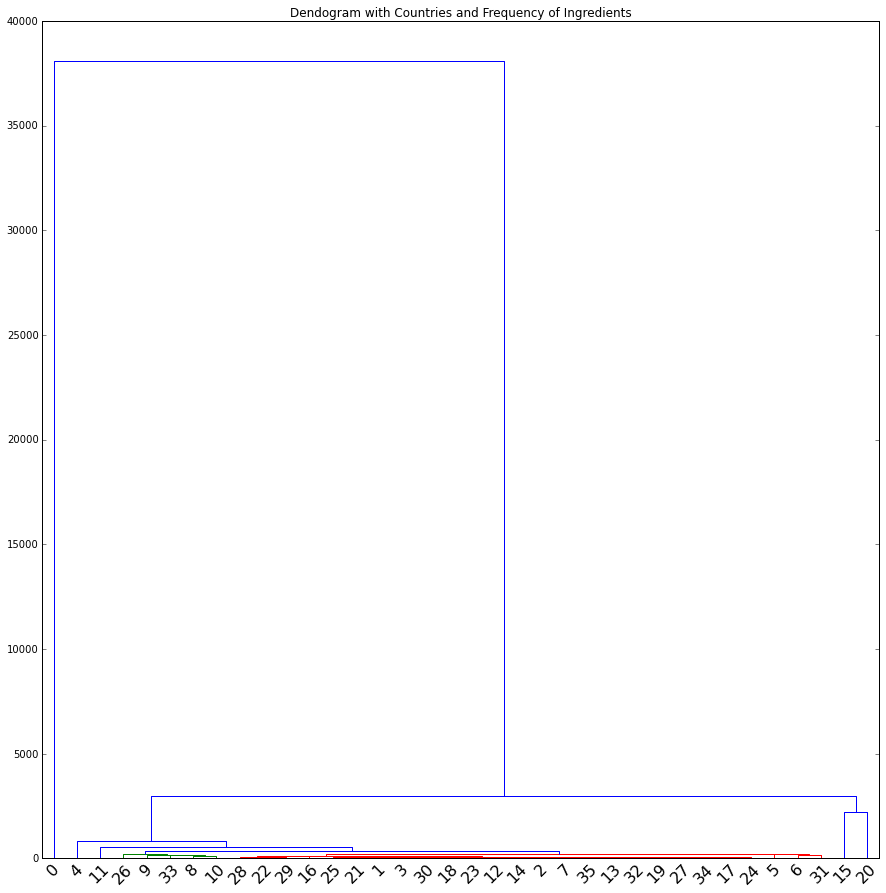

In [9]:
#Plot a dendogram of the frequency of inregients in recipes for countries 

print sorted_countries
print sorted_ingredients
data_countries = np.zeros(shape =(len(sorted_countries), len(ingredients)))
for k in countries.keys():
    diction = countries[k]
    for v in diction.keys():
        i = sorted_countries.index(k)
        j = sorted_ingredients.index(v)
        data_countries[i][j] = diction[v]
print(data_countries)
        
Z2 = hr.linkage(data_countries, method='complete', metric='euclidean')
fig2 = plt.figure(figsize=(15,15))
T2 = hr.dendrogram(Z2, color_threshold = 250, leaf_font_size=16)
plt.title('Dendogram with Countries and Frequency of Ingredients')

fig2.show()


# As you can see from the first list, American is 0 and China is 6

In [ ]:
# Short (datailed) analysis of specific cluster

# Please see the pdf file uploaded 


### References

1. Ahn, Yong-Yeol, et al. "Flavor network and the principles of food pairing." Scientific reports 1 (2011).

In [21]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()